This notebook is being use to showcase the analysis for the selection of BRCA2 mutations on the interacting site with dds1. The current information has been extracted from the MAVISp dataset.

In [2]:
import pandas as pd 
import numpy as np 

## Cancermuts mutations

### Loading data

In [3]:
data = pd.read_csv("MAVISp_selected_mutations.csv")

# Adding GEMME classification "Pathogenic" for >= 0.75, "Benign" for <= 0.25, and "Uncertain" in between 0.25-0.75
conditions = [
    data["GEMME Score (rank-normalized)"] >= 0.75,
    data["GEMME Score (rank-normalized)"] <= 0.25
]
choices = ["Pathogenic", "Benign"]

data["GEMME classification"] = np.select(conditions, choices, default="Uncertain")
data = data.drop_duplicates(subset=["Mutation"], keep="first").reset_index(drop=True)

data

,aa_position,ref_aa,alt_aa,Mutation,HGVSp,HGVSg,Mutation sources,"Stability (FoldX5, alphafold, kcal/mol)","Stability (Rosetta Cartddg2020, alphafold, kcal/mol)","Stability (RaSP, alphafold, kcal/mol)",...,AlphaMissense pathogenicity score,AlphaMissense classification,EVE score,EVE classification (25% Uncertain),"Experimental data (AVENGERS, Functional (AVENGERS,strict))","Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification
0,2481,I,V,I2481V,NP_000050:p.Ile2481Val,"hg19,13:g.32930570A>G","cBioPortal,saturation",0.90777,-0.11735,0.254879,...,0.0795,benign,0.036220,Benign,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic
1,2482,T,A,T2482A,NP_000050:p.Thr2482Ala,"hg19,13:g.32930573A>G, hg38,13:g.32356436A>G","cBioPortal,saturation,clinvar",-0.35980,-0.04286,-0.101636,...,0.0657,benign,0.046056,Benign,Benign Supporting,uncertain,Benign Supporting,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic
2,2483,S,C,S2483C,NP_000050:p.Ser2483Cys,"hg19,13:g.32930576A>T, hg38,13:g.32356439A>T","cBioPortal,COSMIC,saturation,clinvar",0.23297,-0.33605,0.792735,...,0.0750,benign,0.910723,Pathogenic,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
3,2483,S,I,S2483I,NP_000050:p.Ser2483Ile,"hg19,13:g.32930577G>T","cBioPortal,saturation",0.21948,-0.47517,-0.694209,...,0.1253,benign,0.935690,Pathogenic,Pathogenic Very Strong,damaging,Pathogenic Very Strong,damaging,https://doi.org/10.1101/2023.12.14.571713,Benign
4,2487,A,V,A2487V,NP_000050:p.Ala2487Val,NaN,saturation,2.90485,3.74728,0.647614,...,0.2805,benign,0.921421,Pathogenic,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,3180,L,F,L3180F,NP_000050:p.Leu3180Phe,"hg19,13:g.32971071C>T, hg38,13:g.32396934C>T","cBioPortal,COSMIC,saturation,clinvar",2.46402,3.71497,NaN,...,0.3143,benign,0.947194,Pathogenic,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
561,3180,L,H,L3180H,NP_000050:p.Leu3180His,"hg19,13:g.32971072T>A","cBioPortal,saturation",4.20964,5.31667,NaN,...,0.7284,pathogenic,0.947671,Pathogenic,Uncertain,uncertain,Uncertain,uncertain,https://doi.org/10.1101/2023.12.14.571713,Uncertain
562,3180,L,R,L3180R,NP_000050:p.Leu3180Arg,"hg19,13:g.32971072T>G, hg38,13:g.32396935T>G","cBioPortal,COSMIC,saturation,clinvar",4.90328,3.16395,NaN,...,0.5660,pathogenic,0.907750,Pathogenic,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
563,3181,M,T,M3181T,NP_000050:p.Met3181Thr,"hg19,13:g.32971075T>C, hg38,13:g.32396938T>C","cBioPortal,COSMIC,saturation,clinvar",1.60423,0.94524,NaN,...,0.1084,benign,0.588491,Uncertain,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic


### First threshold - VUS ClinVar Interpretation

For the time being we are focused on variants of uncertain significance, or that have conflicting classifications of pathogenicity. We, therefore, use ClinVar annotations to explicitly filtered them

In [4]:
VUS_data = data[
    (data["ClinVar Interpretation"] == "Uncertain significance") | 
    (data["ClinVar Interpretation"] == "Conflicting classifications of pathogenicity") |
    (data["ClinVar Interpretation"] == "Uncertain significance, Uncertain significance") |
    (data["ClinVar Interpretation"] == "Uncertain significance, Conflicting classifications of pathogenicity") |
    (data["ClinVar Interpretation"] == "Uncertain significance, Pathogenic") |
    (data["ClinVar Interpretation"] == "Likely benign, Conflicting classifications of pathogenicity") |
    (data["ClinVar Interpretation"] == "Benign/Likely benign, Conflicting classifications of pathogenicity")
    ].reset_index(drop=True)
VUS_data

,aa_position,ref_aa,alt_aa,Mutation,HGVSp,HGVSg,Mutation sources,"Stability (FoldX5, alphafold, kcal/mol)","Stability (Rosetta Cartddg2020, alphafold, kcal/mol)","Stability (RaSP, alphafold, kcal/mol)",...,AlphaMissense pathogenicity score,AlphaMissense classification,EVE score,EVE classification (25% Uncertain),"Experimental data (AVENGERS, Functional (AVENGERS,strict))","Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification
0,2482,T,A,T2482A,NP_000050:p.Thr2482Ala,"hg19,13:g.32930573A>G, hg38,13:g.32356436A>G","cBioPortal,saturation,clinvar",-0.35980,-0.04286,-0.101636,...,0.0657,benign,0.046056,Benign,Benign Supporting,uncertain,Benign Supporting,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic
1,2483,S,C,S2483C,NP_000050:p.Ser2483Cys,"hg19,13:g.32930576A>T, hg38,13:g.32356439A>T","cBioPortal,COSMIC,saturation,clinvar",0.23297,-0.33605,0.792735,...,0.0750,benign,0.910723,Pathogenic,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
2,2488,R,T,R2488T,NP_000050:p.Arg2488Thr,"hg19,13:g.32930592G>C, hg38,13:g.32356455G>C","cBioPortal,COSMIC,saturation,clinvar",3.38924,1.07959,1.342598,...,0.6042,pathogenic,0.947349,Pathogenic,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Benign
3,2489,D,N,D2489N,NP_000050:p.Asp2489Asn,"hg19,13:g.32930594G>A, hg38,13:g.32356457G>A","cBioPortal,saturation,clinvar",0.79533,-0.37449,0.260792,...,0.0868,benign,0.670257,Uncertain,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
4,2491,Q,H,Q2491H,NP_000050:p.Gln2491His,"hg19,13:g.32930602G>C, hg19,13:g.32930602G>T, ...","cBioPortal,saturation,clinvar",8.16500,2.51463,1.213871,...,0.9608,pathogenic,0.921611,Pathogenic,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3173,C,Y,C3173Y,NP_000050:p.Cys3173Tyr,"hg19,13:g.32971051G>A, hg38,13:g.32396914G>A","cBioPortal,saturation,clinvar",12.32824,7.70816,NaN,...,0.1516,benign,0.536989,Uncertain,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
295,3180,L,F,L3180F,NP_000050:p.Leu3180Phe,"hg19,13:g.32971071C>T, hg38,13:g.32396934C>T","cBioPortal,COSMIC,saturation,clinvar",2.46402,3.71497,NaN,...,0.3143,benign,0.947194,Pathogenic,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
296,3180,L,R,L3180R,NP_000050:p.Leu3180Arg,"hg19,13:g.32971072T>G, hg38,13:g.32396935T>G","cBioPortal,COSMIC,saturation,clinvar",4.90328,3.16395,NaN,...,0.5660,pathogenic,0.907750,Pathogenic,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain
297,3181,M,T,M3181T,NP_000050:p.Met3181Thr,"hg19,13:g.32971075T>C, hg38,13:g.32396938T>C","cBioPortal,COSMIC,saturation,clinvar",1.60423,0.94524,NaN,...,0.1084,benign,0.588491,Uncertain,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic


### Second threshold - Disagreement among functional predictors

Several predictors either gets functionality of the mutations as either being pathogenic or benign. However, there is a discrepancy depending of which predictor is being used. Here we compute a score of disagreement between predictions from DeMaSk, EVE, AlphaMissense, and GEMME.

The initial scoring would be as follows:

- All 4 are the same = +0
- 3 are either benign/pathogenic/uncertain and 1 is different = +1
- 2 are either benign/pathogenic/uncertain and 2 are different = +2

Then a second scoring phase would go on to address uncertainty, as this may be the most interesting one:

- Nothing is uncertain = +0
- 1 is uncertain = +1
- 2 are uncertain = +2
- 3 are uncertain = +3
- All 4 are uncertain = +4

GEMME is already with the labels we want ("Benign", "Pathogenic" and "Uncertain") so lets change every predictor classification label to these.

#### DeMaSk classification

In [5]:
# Ensuring all classes are "Pathogenic", "Benign" or "Uncertain"
# DeMaSk classes: "gain_of_function" and "loss_of_function"

conditions = [
    VUS_data["DeMaSk predicted consequence"] == "gain_of_function",
    VUS_data["DeMaSk predicted consequence"] == "loss_of_function"
]

choices = ["Benign", "Pathogenic"]

VUS_data["DeMaSk classification"] = np.select(conditions, choices, default="Uncertain")

#### AlphaMissense classification

In [6]:
# Ensuring all classes are "Pathogenic", "Benign" or "Uncertain"
# AlphaMissense classes: "benign", "pathogenic" and "ambiguous"

conditions = [
    VUS_data["AlphaMissense classification"] == "benign",
    VUS_data["AlphaMissense classification"] == "pathogenic"
]

choices = ["Benign", "Pathogenic"]

VUS_data["AlphaMissense classification 2"] = np.select(conditions, choices, default="Uncertain")

#### EVE classification

In [7]:
# Ensuring all classes are "Pathogenic", "Benign" or "Uncertain"
# EVE classes: "Benign", "Pathogenic", "Uncertain" and nan

conditions = [
    VUS_data["EVE classification (25% Uncertain)"] == "Benign",
    VUS_data["EVE classification (25% Uncertain)"] == "Pathogenic"
]

choices = ["Benign", "Pathogenic"]

VUS_data["EVE classification"] = np.select(conditions, choices, default="Uncertain")

#### Computing disagreement score - pathogenicity

We would only keep mutations that have disagreement/uncertainty combined score of at least 3 

In [8]:
predictors = VUS_data[[ "GEMME classification", 
                        "DeMaSk classification", 
                        "AlphaMissense classification 2", 
                        "EVE classification"]]

# Function to count how many have the majority class label
def count_most_common_label(row):
    return row.value_counts().max()

# Disagreement score
VUS_data["Disagreement Score"] = 5 - predictors.apply(count_most_common_label, axis=1)

# Uncertainty score
VUS_data["Uncertainty Score"] = predictors.apply(lambda row: (row == "Uncertain").sum(), axis=1)

# Overall score
VUS_data["Disagreement/Uncertainty Score"] = VUS_data["Disagreement Score"] + VUS_data["Uncertainty Score"]

# Rearrange dataframe 
VUS_scored_data = VUS_data[VUS_data["Disagreement/Uncertainty Score"] >= 2].reset_index(drop=True)
VUS_scored_data = VUS_scored_data.sort_values(by="aa_position", ascending=True).reset_index(drop=True)
VUS_scored_data

,aa_position,ref_aa,alt_aa,Mutation,HGVSp,HGVSg,Mutation sources,"Stability (FoldX5, alphafold, kcal/mol)","Stability (Rosetta Cartddg2020, alphafold, kcal/mol)","Stability (RaSP, alphafold, kcal/mol)",...,"Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification,DeMaSk classification,AlphaMissense classification 2,EVE classification,Disagreement Score,Uncertainty Score,Disagreement/Uncertainty Score
0,2482,T,A,T2482A,NP_000050:p.Thr2482Ala,"hg19,13:g.32930573A>G, hg38,13:g.32356436A>G","cBioPortal,saturation,clinvar",-0.35980,-0.04286,-0.101636,...,Benign Supporting,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic,Benign,Benign,Benign,2,0,2
1,2483,S,C,S2483C,NP_000050:p.Ser2483Cys,"hg19,13:g.32930576A>T, hg38,13:g.32356439A>T","cBioPortal,COSMIC,saturation,clinvar",0.23297,-0.33605,0.792735,...,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Pathogenic,Benign,Pathogenic,3,1,4
2,2488,R,T,R2488T,NP_000050:p.Arg2488Thr,"hg19,13:g.32930592G>C, hg38,13:g.32356455G>C","cBioPortal,COSMIC,saturation,clinvar",3.38924,1.07959,1.342598,...,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Benign,Pathogenic,Pathogenic,Pathogenic,2,0,2
3,2489,D,N,D2489N,NP_000050:p.Asp2489Asn,"hg19,13:g.32930594G>A, hg38,13:g.32356457G>A","cBioPortal,saturation,clinvar",0.79533,-0.37449,0.260792,...,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Pathogenic,Benign,Uncertain,3,2,5
4,2491,Q,H,Q2491H,NP_000050:p.Gln2491His,"hg19,13:g.32930602G>C, hg19,13:g.32930602G>T, ...","cBioPortal,saturation,clinvar",8.16500,2.51463,1.213871,...,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign,Pathogenic,Pathogenic,Pathogenic,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3173,C,Y,C3173Y,NP_000050:p.Cys3173Tyr,"hg19,13:g.32971051G>A, hg38,13:g.32396914G>A","cBioPortal,saturation,clinvar",12.32824,7.70816,NaN,...,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Pathogenic,Benign,Uncertain,3,2,5
295,3180,L,F,L3180F,NP_000050:p.Leu3180Phe,"hg19,13:g.32971071C>T, hg38,13:g.32396934C>T","cBioPortal,COSMIC,saturation,clinvar",2.46402,3.71497,NaN,...,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Pathogenic,Benign,Pathogenic,3,1,4
296,3180,L,R,L3180R,NP_000050:p.Leu3180Arg,"hg19,13:g.32971072T>G, hg38,13:g.32396935T>G","cBioPortal,COSMIC,saturation,clinvar",4.90328,3.16395,NaN,...,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Pathogenic,Pathogenic,Pathogenic,2,1,3
297,3181,M,T,M3181T,NP_000050:p.Met3181Thr,"hg19,13:g.32971075T>C, hg38,13:g.32396938T>C","cBioPortal,COSMIC,saturation,clinvar",1.60423,0.94524,NaN,...,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Pathogenic,Pathogenic,Benign,Uncertain,3,1,4


### Third threshold - Mutations that happens on the same site

As a last filter we are going to focus on the mutations that occured on the same AA position more than once. In this case we are going to retain mutations that have been recorded on the same site at least 5 times.

In [9]:
VUS_final = VUS_scored_data[VUS_scored_data["aa_position"].map(VUS_scored_data["aa_position"].value_counts()) >= 3].reset_index(drop=True)
VUS_final["aa_position"].unique() # 12 sites!

for site in VUS_final["aa_position"].unique():
    print(f"AA_position: {site} | Reference AA: {VUS_final[VUS_final['aa_position']==site]['ref_aa'].iloc[0]}")

AA_position: 2491 | Reference AA: Q
AA_position: 2520 | Reference AA: R
AA_position: 2533 | Reference AA: S
AA_position: 2561 | Reference AA: Q
AA_position: 2566 | Reference AA: D
AA_position: 2650 | Reference AA: E
AA_position: 2687 | Reference AA: V
AA_position: 2790 | Reference AA: T
AA_position: 2800 | Reference AA: P
AA_position: 2896 | Reference AA: R
AA_position: 3036 | Reference AA: Q
AA_position: 3039 | Reference AA: P


The site of the mutations to be compute are now decided. To close up this notebook we are going to repeat step 2 in the original Cancermut data we had but only on these sites

#### Closure

In [10]:
# Selection of mutation sites
selected_aa_sites = data[data["aa_position"].isin(VUS_final["aa_position"].unique())].reset_index(drop=True)

# Ensuring all classes are "Pathogenic", "Benign" or "Uncertain"

# DeMaSk classes: "gain_of_function" and "loss_of_function"

conditions = [
    selected_aa_sites["DeMaSk predicted consequence"] == "gain_of_function",
    selected_aa_sites["DeMaSk predicted consequence"] == "loss_of_function"
]

choices = ["Benign", "Pathogenic"]

selected_aa_sites["DeMaSk classification"] = np.select(conditions, choices, default="Uncertain")

# AlphaMissense classes: "benign", "pathogenic" and "ambiguous"

conditions = [
    selected_aa_sites["AlphaMissense classification"] == "benign",
    selected_aa_sites["AlphaMissense classification"] == "pathogenic"
]

choices = ["Benign", "Pathogenic"]

selected_aa_sites["AlphaMissense classification 2"] = np.select(conditions, choices, default="Uncertain")

# EVE classes: "Benign", "Pathogenic", "Uncertain" and nan

conditions = [
    selected_aa_sites["EVE classification (25% Uncertain)"] == "Benign",
    selected_aa_sites["EVE classification (25% Uncertain)"] == "Pathogenic"
]

choices = ["Benign", "Pathogenic"]

selected_aa_sites["EVE classification"] = np.select(conditions, choices, default="Uncertain")

# Save
# selected_aa_sites.to_csv("selected_mutation_sites.csv", index=False)

/tmp/ipykernel_1425133/262232513.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)


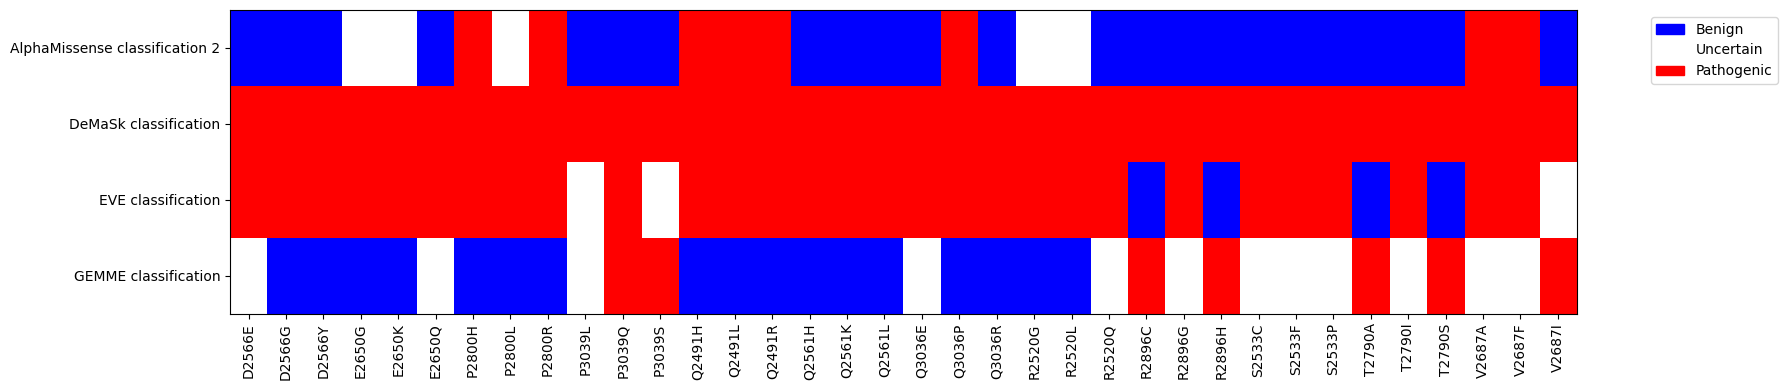

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Prepare the data
predictors = [
    "GEMME classification",
    "DeMaSk classification",
    "AlphaMissense classification 2",
    "EVE classification",
]

# Melt to long format
df_melt = selected_aa_sites.melt(
    id_vars=["Mutation"],
    value_vars=predictors,
    var_name="Predictor",
    value_name="Classification"
)

# Pivot to wide format for heatmap
heatmap_df = df_melt.pivot(
    index="Predictor",
    columns="Mutation",
    values="Classification"
)

# Map classifications to numerical codes
categories = ["Benign", "Uncertain", "Pathogenic"]
color_map = ["blue", "white", "red"]
cmap = ListedColormap(color_map)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N)

numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)

# Plot
fig, ax = plt.subplots(figsize=(max(8, numeric_df.shape[1]*0.5), max(4, numeric_df.shape[0]*0.5)))
im = ax.imshow(numeric_df, cmap=cmap, norm=norm, aspect="auto")

# Set tick labels
ax.set_xticks(range(len(numeric_df.columns)))
ax.set_xticklabels(numeric_df.columns, rotation=90)
ax.set_yticks(range(len(numeric_df.index)))
ax.set_yticklabels(numeric_df.index)

# Legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=color_map[i], label=categories[i]) for i in range(len(categories))]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Whole BRCA2 MAVISp mutations - selected sites

### Loading data

In [11]:
data = pd.read_csv("../mavisp/BRCA2-simple_mode.csv")

# Add aa_position, ref_aa and alt_aa
data[['ref_aa','aa_position','alt_aa']] = data['Mutation'].str.extract(r'([A-Za-z])(\d+)([A-Za-z])')
data['aa_position'] = data['aa_position'].astype(int)
# Move them to the front
cols_to_front = ['ref_aa', 'aa_position', 'alt_aa']
data = data[cols_to_front + [col for col in data.columns if col not in cols_to_front]]

# Adding GEMME classification "Pathogenic" for >= 0.75, "Benign" for <= 0.25, and "Uncertain" in between 0.25-0.75
conditions = [
    data["GEMME Score (rank-normalized)"] >= 0.75,
    data["GEMME Score (rank-normalized)"] <= 0.25
]
choices = ["Loss of function", "Benign / Neutral"]

data["GEMME classification"] = np.select(conditions, choices, default="Uncertain")
data = data.drop_duplicates(subset=["Mutation"], keep="first").reset_index(drop=True)

data

,ref_aa,aa_position,alt_aa,Mutation,HGVSp,HGVSg,gnomAD genome allele frequency,gnomAD exome allele frequency,REVEL score,Mutation sources,...,EVE score,EVE classification (25% Uncertain),AlphaMissense pathogenicity score,AlphaMissense classification,"Experimental data (AVENGERS, Functional (AVENGERS,strict))","Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification
0,D,2479,A,D2479A,NP_000050:p.Asp2479Ala,NaN,NaN,NaN,NaN,saturation,...,0.946851,Pathogenic,0.1239,benign,Pathogenic Moderate,damaging,Pathogenic Moderate,damaging,https://doi.org/10.1101/2023.12.14.571713,Uncertain
1,D,2479,C,D2479C,NP_000050:p.Asp2479Cys,NaN,NaN,NaN,NaN,saturation,...,0.913179,Pathogenic,0.3113,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain
2,D,2479,E,D2479E,NP_000050:p.Asp2479Glu,"hg19,13:g.32930566T>G, hg38,13:g.32356429T>G",NaN,NaN,0.649,"saturation,clinvar",...,0.942493,Pathogenic,0.1587,benign,Pathogenic Strong,damaging,Pathogenic Strong,damaging,https://doi.org/10.1101/2023.12.14.571713,Uncertain
3,D,2479,F,D2479F,NP_000050:p.Asp2479Phe,NaN,NaN,NaN,NaN,saturation,...,0.940955,Pathogenic,0.3078,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain
4,D,2479,G,D2479G,NP_000050:p.Asp2479Gly,"hg19,13:g.32930565A>G, hg38,13:g.32356428A>G",NaN,NaN,0.616,"saturation,clinvar",...,0.938867,Pathogenic,0.1137,benign,Pathogenic Supporting,uncertain,Pathogenic Supporting,damaging,https://doi.org/10.1101/2023.12.14.571713,Uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13428,H,3185,S,H3185S,NP_000050:p.His3185Ser,NaN,NaN,NaN,NaN,saturation,...,0.000129,Benign,0.0863,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Loss of function
13429,H,3185,T,H3185T,NP_000050:p.His3185Thr,NaN,NaN,NaN,NaN,saturation,...,0.007206,Benign,0.1075,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Loss of function
13430,H,3185,V,H3185V,NP_000050:p.His3185Val,NaN,NaN,NaN,NaN,saturation,...,0.004916,Benign,0.1340,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain
13431,H,3185,W,H3185W,NP_000050:p.His3185Trp,NaN,NaN,NaN,NaN,saturation,...,0.000004,Benign,0.2333,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Loss of function


In [12]:
# Selection of mutation sites
selected_aa_sites = data[data["aa_position"].isin(VUS_final["aa_position"].unique())].reset_index(drop=True)

# Ensuring all classes are "Pathogenic", "Benign" or "Uncertain"

# DeMaSk classes: "gain_of_function" and "loss_of_function"

conditions = [
    selected_aa_sites["DeMaSk predicted consequence"] == "gain_of_function",
    selected_aa_sites["DeMaSk predicted consequence"] == "loss_of_function"
]

choices = ["Gain of function", "Loss of function"]

selected_aa_sites["DeMaSk classification"] = np.select(conditions, choices, default="Uncertain")

# AlphaMissense classes: "benign", "pathogenic" and "ambiguous"

conditions = [
    selected_aa_sites["AlphaMissense classification"] == "benign",
    selected_aa_sites["AlphaMissense classification"] == "pathogenic"
]

choices = ["Benign / Neutral", "Pathogenic"]

selected_aa_sites[" AlphaMissense classification"] = np.select(conditions, choices, default="Uncertain")

# EVE classes: "Benign", "Pathogenic", "Uncertain" and nan

conditions = [
    selected_aa_sites["EVE classification (25% Uncertain)"] == "Benign",
    selected_aa_sites["EVE classification (25% Uncertain)"] == "Pathogenic"
]

choices = ["Benign / Neutral", "Pathogenic"]

selected_aa_sites["EVE classification"] = np.select(conditions, choices, default="Uncertain")

selected_aa_sites

,ref_aa,aa_position,alt_aa,Mutation,HGVSp,HGVSg,gnomAD genome allele frequency,gnomAD exome allele frequency,REVEL score,Mutation sources,...,AlphaMissense classification,"Experimental data (AVENGERS, Functional (AVENGERS,strict))","Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification,DeMaSk classification,AlphaMissense classification,EVE classification
0,Q,2491,A,Q2491A,NP_000050:p.Gln2491Ala,NaN,NaN,NaN,NaN,saturation,...,pathogenic,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic
1,Q,2491,C,Q2491C,NP_000050:p.Gln2491Cys,NaN,NaN,NaN,NaN,saturation,...,pathogenic,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic
2,Q,2491,D,Q2491D,NP_000050:p.Gln2491Asp,NaN,NaN,NaN,NaN,saturation,...,pathogenic,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Pathogenic,Pathogenic
3,Q,2491,E,Q2491E,NP_000050:p.Gln2491Glu,NaN,NaN,NaN,NaN,saturation,...,benign,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic
4,Q,2491,F,Q2491F,NP_000050:p.Gln2491Phe,NaN,NaN,NaN,NaN,saturation,...,pathogenic,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,P,3039,S,P3039S,NP_000050:p.Pro3039Ser,"hg19,13:g.32954048C>T, hg38,13:g.32379911C>T",NaN,NaN,0.272,"cBioPortal,COSMIC,saturation,clinvar",...,benign,Benign Strong,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Loss of function,Loss of function,Benign / Neutral,Uncertain
224,P,3039,T,P3039T,NP_000050:p.Pro3039Thr,NaN,NaN,NaN,NaN,saturation,...,benign,Benign Very Strong,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Loss of function,Loss of function,Benign / Neutral,Pathogenic
225,P,3039,V,P3039V,NP_000050:p.Pro3039Val,NaN,NaN,NaN,NaN,saturation,...,benign,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic
226,P,3039,W,P3039W,NP_000050:p.Pro3039Trp,NaN,NaN,NaN,NaN,saturation,...,ambiguous,NaN,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Uncertain,Pathogenic


### Plotting discrepancy among predictors

/tmp/ipykernel_1573465/4208520952.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)


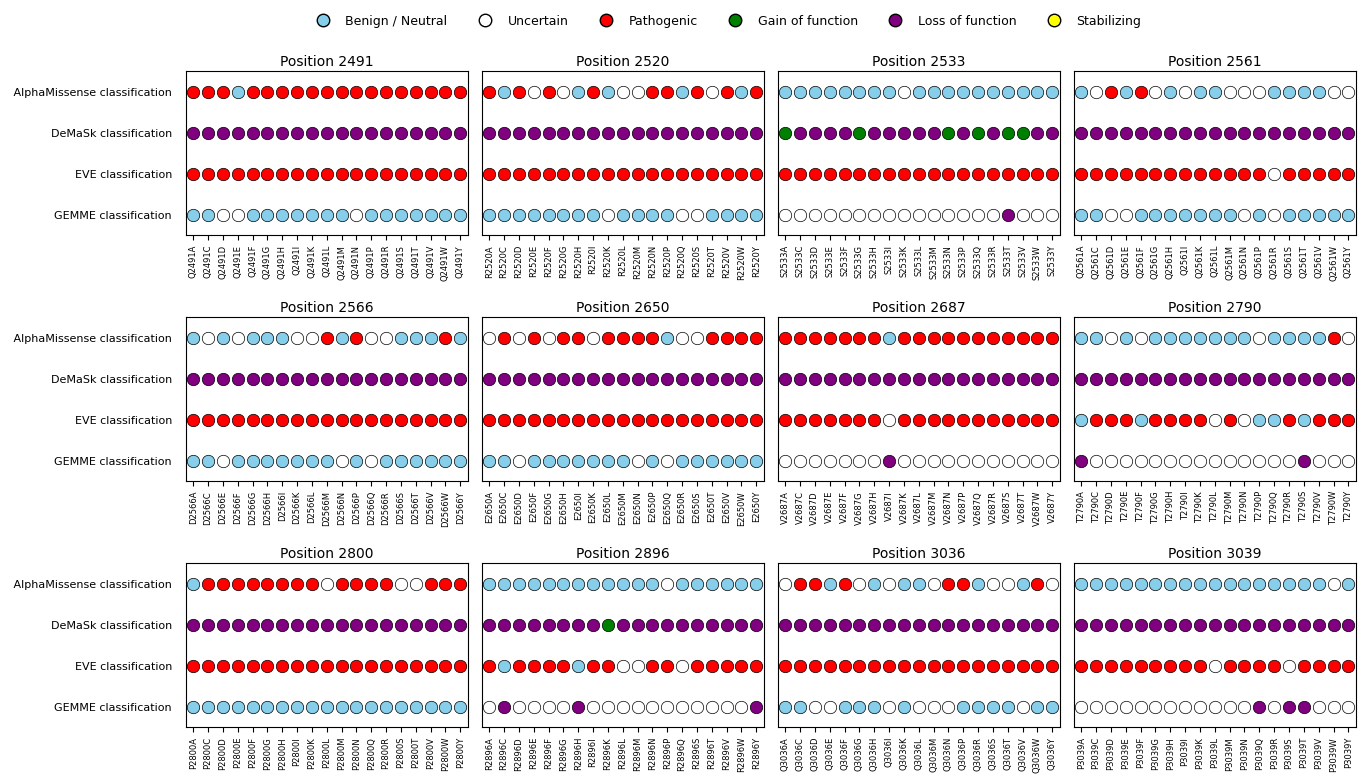

In [13]:
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Prepare the data
predictors = [
    "GEMME classification",
    "DeMaSk classification",
    " AlphaMissense classification",
    "EVE classification",
]

# Melt to long format
df_melt = selected_aa_sites.melt(
    id_vars=["Mutation"],
    value_vars=predictors,
    var_name="Predictor",
    value_name="Classification"
)

# Pivot to wide format for heatmap
heatmap_df = df_melt.pivot(
    index="Predictor",
    columns="Mutation",
    values="Classification"
)

# Map classifications to numerical codes
categories = ["Benign / Neutral", "Uncertain", "Pathogenic", "Gain of function", "Loss of function", "Stabilizing"]
color_map = ["skyblue", "white", "red", "green", "purple", "yellow"]
cmap = ListedColormap(color_map)
bounds = list(range(len(categories) + 1))
norm   = BoundaryNorm(bounds, cmap.N)

numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)

cmap = ListedColormap(color_map)
positions = [re.search(r'\d+', col).group() for col in numeric_df.columns]
unique_positions = sorted(set(positions), key=lambda x: int(x))

# 4×3 grid with a tiny gap horizontally and vertically
fig, axes = plt.subplots(
    3, 4,
    figsize=(18, 8),
    sharey=False,
    constrained_layout=False,
    gridspec_kw={'wspace': 0.05, 'hspace': 0.5}
)
axes = axes.flatten()

# Reserve space on left for predictor labels, and space on top for the legend
fig.subplots_adjust(left=0.25, top=0.93)

for idx, (ax, pos) in enumerate(zip(axes, unique_positions)):
    cols = [c for c in numeric_df.columns if re.search(r'\d+', c).group() == pos]

    # Draw circles
    for i, predictor in enumerate(numeric_df.index):
        for j, mut in enumerate(cols):
            code = numeric_df.at[predictor, mut]
            if code < 0:
                continue
            ax.scatter(
                j, i,
                marker='o',
                s=80,
                facecolor=cmap(code),
                edgecolor='black',
                linewidth=0.5
            )

    # X-axis labels
    ax.set_xticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=6)

    # Title
    ax.set_title(f'Position {pos}', fontsize=10, pad=4)

    # Y-axis labels only in first column of each row
    if idx % 4 == 0:
        ax.set_yticks(range(len(numeric_df.index)))
        ax.set_yticklabels(numeric_df.index, fontsize=8)
        ax.tick_params(
            axis='y',
            which='both',
            labelleft=True,
            labelright=False,
            pad=10,
            length=0
        )
    else:
        ax.set_yticks([])
        ax.tick_params(labelleft=False)

    # Tight bounds
    ax.set_xlim(-0.5, len(cols) - 0.5)
    ax.set_ylim(len(numeric_df.index) - 0.5, -0.5)

# Remove any extra axes if fewer than 12 positions
for ax in axes[len(unique_positions):]:
    fig.delaxes(ax)

# Legend on top with circle markers
legend_handles = [
    Line2D([], [], marker='o', linestyle='None',
           markersize=9,
           markerfacecolor=color_map[i],
           markeredgecolor='black',
           label=categories[i])
    for i in range(len(categories))
]
fig.legend(
    handles=legend_handles,
    ncol=len(categories),
    frameon=False,
    fontsize=9,
    loc='lower center',
    bbox_to_anchor=(0.55, 0.97)   # y=0.97 to tuck it just under the top
)

plt.show()

### Combining data with energy calculations (local interaction and stability)

In [14]:
# Data from local interaction computation
path_energy = "../complex_binding/energies.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

uncertain_th = 0.15

df_energy_long["Local interaction classification"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  1 + uncertain_th else
        "Stabilizing" if x <= -1 - uncertain_th else
        "Benign / Neutral"      if (x <=  1 - uncertain_th and x >= -1 + uncertain_th) else
        "Uncertain"
    )
)

df_energy_merged = selected_aa_sites.merge(df_energy_long[["Mutation", "Local interaction classification"]], how="left", on="Mutation")

# Data from stability computation
path_energy = "../stability/energies.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

df_energy_long["Stabilization classification"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  3 else
        "Stabilizing" if x <= -3 else
        "Benign / Neutral"      if (x <  2 and x > -2) else
        "Uncertain"
    )
)

df_energy_merged = df_energy_merged.merge(df_energy_long[["Mutation", "Stabilization classification"]], how="left", on="Mutation")

df_energy_merged

,ref_aa,aa_position,alt_aa,Mutation,HGVSp,HGVSg,gnomAD genome allele frequency,gnomAD exome allele frequency,REVEL score,Mutation sources,...,"Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification,DeMaSk classification,AlphaMissense classification,EVE classification,Local interaction classification,Stabilization classification
0,Q,2491,A,Q2491A,NP_000050:p.Gln2491Ala,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Benign / Neutral
1,Q,2491,C,Q2491C,NP_000050:p.Gln2491Cys,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Benign / Neutral
2,Q,2491,D,Q2491D,NP_000050:p.Gln2491Asp,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Destabilizing
3,Q,2491,E,Q2491E,NP_000050:p.Gln2491Glu,NaN,NaN,NaN,NaN,saturation,...,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic,Benign / Neutral,Uncertain
4,Q,2491,F,Q2491F,NP_000050:p.Gln2491Phe,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Destabilizing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,P,3039,S,P3039S,NP_000050:p.Pro3039Ser,"hg19,13:g.32954048C>T, hg38,13:g.32379911C>T",NaN,NaN,0.272,"cBioPortal,COSMIC,saturation,clinvar",...,neutral,Benign Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Loss of function,Loss of function,Benign / Neutral,Uncertain,Benign / Neutral,Benign / Neutral
224,P,3039,T,P3039T,NP_000050:p.Pro3039Thr,NaN,NaN,NaN,NaN,saturation,...,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Loss of function,Loss of function,Benign / Neutral,Pathogenic,Benign / Neutral,Benign / Neutral
225,P,3039,V,P3039V,NP_000050:p.Pro3039Val,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic,Benign / Neutral,Benign / Neutral
226,P,3039,W,P3039W,NP_000050:p.Pro3039Trp,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Uncertain,Pathogenic,Benign / Neutral,Benign / Neutral


/tmp/ipykernel_1573465/3413124244.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)


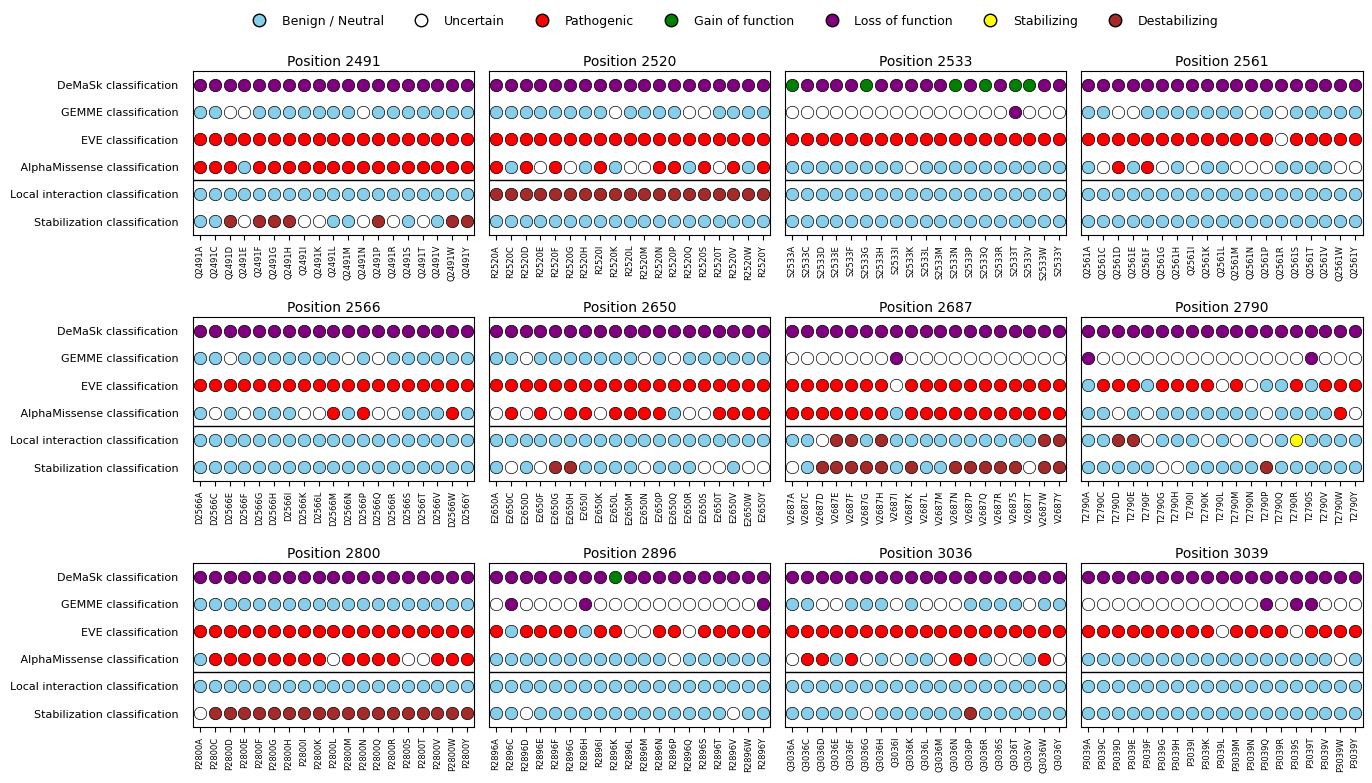

In [15]:
# Prepare the data
predictors = [
    "DeMaSk classification",
    "GEMME classification",
    "EVE classification",
    " AlphaMissense classification",
    "Local interaction classification",
    "Stabilization classification"
]

# Melt to long format
df_melt = df_energy_merged.melt(
    id_vars=["Mutation"],
    value_vars=predictors,
    var_name="Predictor",
    value_name="Classification"
)

# Pivot to wide format for heatmap
heatmap_df = df_melt.pivot(
    index="Predictor",
    columns="Mutation",
    values="Classification"
).reindex(index=predictors)

# Map classifications to numerical codes
categories = ["Benign / Neutral", "Uncertain", "Pathogenic", "Gain of function", "Loss of function", "Stabilizing", "Destabilizing"]
color_map = ["skyblue", "white", "red", "green", "purple", "yellow", "brown"]
cmap = ListedColormap(color_map)
bounds = list(range(len(categories) + 1))
norm   = BoundaryNorm(bounds, cmap.N)

numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)

cmap = ListedColormap(color_map)
positions = [re.search(r'\d+', col).group() for col in numeric_df.columns]
unique_positions = sorted(set(positions), key=lambda x: int(x))

# 4×3 grid with a tiny gap horizontally and vertically
fig, axes = plt.subplots(
    3, 4,
    figsize=(18, 8),
    sharey=False,
    constrained_layout=False,
    gridspec_kw={'wspace': 0.05, 'hspace': 0.5}
)
axes = axes.flatten()

# Reserve space on left for predictor labels, and space on top for the legend
fig.subplots_adjust(left=0.25, top=0.93)

for idx, (ax, pos) in enumerate(zip(axes, unique_positions)):
    cols = [c for c in numeric_df.columns if re.search(r'\d+', c).group() == pos]

    # Draw circles
    for i, predictor in enumerate(numeric_df.index):
        for j, mut in enumerate(cols):
            code = numeric_df.at[predictor, mut]
            if code < 0:
                continue
            ax.scatter(
                j, i,
                marker='o',
                s=80,
                facecolor=cmap(code),
                edgecolor='black',
                linewidth=0.5
            )
        
    # add the horizontal divider for energy class
    ax.axhline(
        y= 4 - 0.5,
        color='black',
        linewidth=1
    )

    # X-axis labels
    ax.set_xticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=6)

    # Title
    ax.set_title(f'Position {pos}', fontsize=10, pad=4)

    # Y-axis labels only in first column of each row
    if idx % 4 == 0:
        ax.set_yticks(range(len(numeric_df.index)))
        ax.set_yticklabels(numeric_df.index, fontsize=8)
        ax.tick_params(
            axis='y',
            which='both',
            labelleft=True,
            labelright=False,
            pad=10,
            length=0
        )
    else:
        ax.set_yticks([])
        ax.tick_params(labelleft=False)

    # Tight bounds
    ax.set_xlim(-0.5, len(cols) - 0.5)
    ax.set_ylim(len(numeric_df.index) - 0.5, -0.5)

# Remove any extra axes if fewer than 12 positions
for ax in axes[len(unique_positions):]:
    fig.delaxes(ax)

# Legend on top with circle markers
legend_handles = [
    Line2D([], [], marker='o', linestyle='None',
           markersize=9,
           markerfacecolor=color_map[i],
           markeredgecolor='black',
           label=categories[i])
    for i in range(len(categories))
]
fig.legend(
    handles=legend_handles,
    ncol=len(categories),
    frameon=False,
    fontsize=9,
    loc='lower center',
    bbox_to_anchor=(0.55, 0.97)   # y=0.97 to tuck it just under the top
)

plt.show()

# Pathogenic (AlphaMissense and EVE)
# Benign / neutral (AlphaMissense, EVE, DeMaSk and GEMME)
# Gain of function (DeMaSk)
# Loss of function (DeMaSk)

# DeMaSk is either loss of function, gain of function or neutral
# GEMME is either loss of function or neutral

# Stabilizing (for local interaction or stabilization)

# SEPARATE EVERY ANNOTATION WITH ITS RIGHT CATEGORY

### Checking results for ensemble model

In [16]:
# Data from local interaction computation
path_energy = "../complex_binding/energies.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

uncertain_th = 0.15

df_energy_long["Local interaction classification"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  1 + uncertain_th else
        "Stabilizing" if x <= -1 - uncertain_th else
        "Benign / Neutral"      if (x <=  1 - uncertain_th and x >= -1 + uncertain_th) else
        "Uncertain"
    )
)

df_energy_merged = selected_aa_sites.merge(df_energy_long[["Mutation", "Local interaction classification"]], how="left", on="Mutation")


# Data from ensemble local interaction computation
path_energy = "../complex_binding/ensemble_run/energies_ensemble.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

uncertain_th = 0.15

df_energy_long["Local interaction classification (ensemble)"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  1 + uncertain_th else
        "Stabilizing" if x <= -1 - uncertain_th else
        "Benign / Neutral"      if (x <=  1 - uncertain_th and x >= -1 + uncertain_th) else
        "Uncertain"
    )
)

df_energy_merged = df_energy_merged.merge(df_energy_long[["Mutation", "Local interaction classification (ensemble)"]], how="right", on="Mutation")

df_energy_merged = df_energy_merged.dropna(subset=["ref_aa"])

/tmp/ipykernel_1573465/1557447014.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)


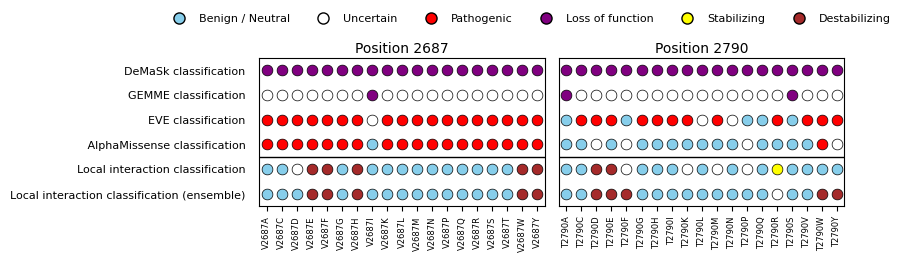

In [17]:
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Prepare the data
predictors = [
    "DeMaSk classification",
    "GEMME classification",
    "EVE classification",
    " AlphaMissense classification",
    "Local interaction classification",
    "Local interaction classification (ensemble)",
]

# Melt to long format
df_melt = df_energy_merged.melt(
    id_vars=["Mutation"],
    value_vars=predictors,
    var_name="Predictor",
    value_name="Classification"
)

# Pivot to wide format for heatmap
heatmap_df = df_melt.pivot(
    index="Predictor",
    columns="Mutation",
    values="Classification"
).reindex(index=predictors)

# Map classifications to numerical codes
categories = ["Benign / Neutral", "Uncertain", "Pathogenic", "Loss of function", "Stabilizing", "Destabilizing"]
color_map = ["skyblue", "white", "red", "purple", "yellow", "brown"]
cmap = ListedColormap(color_map)
bounds = list(range(len(categories) + 1))
norm   = BoundaryNorm(bounds, cmap.N)

numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)

cmap = ListedColormap(color_map)
positions = [re.search(r'\d+', col).group() for col in numeric_df.columns]
unique_positions = sorted(set(positions), key=lambda x: int(x))

# 4×3 grid with a tiny gap horizontally and vertically
fig, axes = plt.subplots(
    1, 2,
    figsize=(9, 2),
    sharey=False,
    constrained_layout=False,
    gridspec_kw={'wspace': 0.05, 'hspace': 0.5}
)
axes = axes.flatten()

# Reserve space on left for predictor labels, and space on top for the legend
fig.subplots_adjust(left=0.25, top=0.85)

for idx, (ax, pos) in enumerate(zip(axes, unique_positions)):
    cols = [c for c in numeric_df.columns if re.search(r'\d+', c).group() == pos]

    # Draw circles
    for i, predictor in enumerate(numeric_df.index):
        for j, mut in enumerate(cols):
            code = numeric_df.at[predictor, mut]
            if code < 0:
                continue
            ax.scatter(
                j, i,
                marker='o',
                s=60,
                facecolor=cmap(code),
                edgecolor='black',
                linewidth=0.5
            )
        
    # add the horizontal divider for energy class
    ax.axhline(
        y= 4 - 0.5,
        color='black',
        linewidth=1
    )

    # X-axis labels
    ax.set_xticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=6)

    # Title
    ax.set_title(f'Position {pos}', fontsize=10, pad=4)

    # Y-axis labels only in first column of each row
    if idx % 2 == 0:
        ax.set_yticks(range(len(numeric_df.index)))
        ax.set_yticklabels(numeric_df.index, fontsize=8)
        ax.tick_params(
            axis='y',
            which='both',
            labelleft=True,
            labelright=False,
            pad=10,
            length=0
        )
    else:
        ax.set_yticks([])
        ax.tick_params(labelleft=False)

    # Tight bounds
    ax.set_xlim(-0.5, len(cols) - 0.5)
    ax.set_ylim(len(numeric_df.index) - 0.5, -0.5)

# Remove any extra axes if fewer than 12 positions
for ax in axes[len(unique_positions):]:
    fig.delaxes(ax)

# Legend on top with circle markers
legend_handles = [
    Line2D([], [], marker='o', linestyle='None',
           markersize=8,
           markerfacecolor=color_map[i],
           markeredgecolor='black',
           label=categories[i])
    for i in range(len(categories))
]
fig.legend(
    handles=legend_handles,
    ncol=len(categories),
    frameon=False,
    fontsize=8,
    loc='lower center',
    bbox_to_anchor=(0.55, 0.97)   # y=0.97 to tuck it just under the top
)

plt.show()

### Ensemble stability plots

In [18]:
# ---------------

# Data from stability calculations

# Data from stability computation
path_energy = "../stability/energies.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

df_energy_long["Stability classification"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  3 else
        "Stabilizing" if x <= -3 else
        "Benign / Neutral"      if (x <  2 and x > -2) else
        "Uncertain"
    )
)

df_energy_merged = selected_aa_sites.merge(df_energy_long[["Mutation", "Stability classification"]], how="left", on="Mutation")

# Ensemble stability calculations

path_energy = "../group_5_cabflex/brac_alone_correct/output_pdbs/ensemble_run2/energies.csv"
df_energy = pd.read_csv(path_energy).drop(["chain ID"], axis=1)

# Pivot longer to have format similar to predictors
df_energy_long = pd.melt(df_energy, id_vars=["WT residue type", "Residue #"], var_name="Residue mut", value_name="Energy")
df_energy_long["Mutation"] = df_energy_long["WT residue type"] + df_energy_long['Residue #'].astype(str) + df_energy_long["Residue mut"]

df_energy_long["Stability classification (ensemble)"] = df_energy_long["Energy"].round(1).apply(
    lambda x: (
        "Destabilizing" if x >=  3 else
        "Stabilizing" if x <= -3 else
        "Benign / Neutral"      if (x <  2 and x > -2) else
        "Uncertain"
    )
)

df_energy_merged = df_energy_merged.merge(df_energy_long[["Mutation", "Stability classification (ensemble)"]], how="inner", on="Mutation")

df_energy_merged

,ref_aa,aa_position,alt_aa,Mutation,HGVSp,HGVSg,gnomAD genome allele frequency,gnomAD exome allele frequency,REVEL score,Mutation sources,...,"Experimental data classification (AVENGERS, Functional (AVENGERS,strict))","Experimental data (AVENGERS, Functional (AVENGERS,permissive))","Experimental data classification (AVENGERS, Functional (AVENGERS,permissive))",References,GEMME classification,DeMaSk classification,AlphaMissense classification,EVE classification,Stability classification,Stability classification (ensemble)
0,Q,2491,C,Q2491C,NP_000050:p.Gln2491Cys,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Benign / Neutral
1,Q,2491,D,Q2491D,NP_000050:p.Gln2491Asp,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Pathogenic,Pathogenic,Destabilizing,Uncertain
2,Q,2491,E,Q2491E,NP_000050:p.Gln2491Glu,NaN,NaN,NaN,NaN,saturation,...,neutral,Benign Very Strong,neutral,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic,Uncertain,Uncertain
3,Q,2491,F,Q2491F,NP_000050:p.Gln2491Phe,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Destabilizing,Destabilizing
4,Q,2491,G,Q2491G,NP_000050:p.Gln2491Gly,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Destabilizing,Benign / Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Q,3036,S,Q3036S,NP_000050:p.Gln3036Ser,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Uncertain,Pathogenic,Benign / Neutral,Benign / Neutral
122,Q,3036,T,Q3036T,NP_000050:p.Gln3036Thr,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Uncertain,Pathogenic,Benign / Neutral,Benign / Neutral
123,Q,3036,V,Q3036V,NP_000050:p.Gln3036Val,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Uncertain,Loss of function,Benign / Neutral,Pathogenic,Benign / Neutral,Benign / Neutral
124,Q,3036,W,Q3036W,NP_000050:p.Gln3036Trp,NaN,NaN,NaN,NaN,saturation,...,NaN,NaN,NaN,https://doi.org/10.1101/2023.12.14.571713,Benign / Neutral,Loss of function,Pathogenic,Pathogenic,Benign / Neutral,Benign / Neutral


/tmp/ipykernel_1573465/3418387489.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)


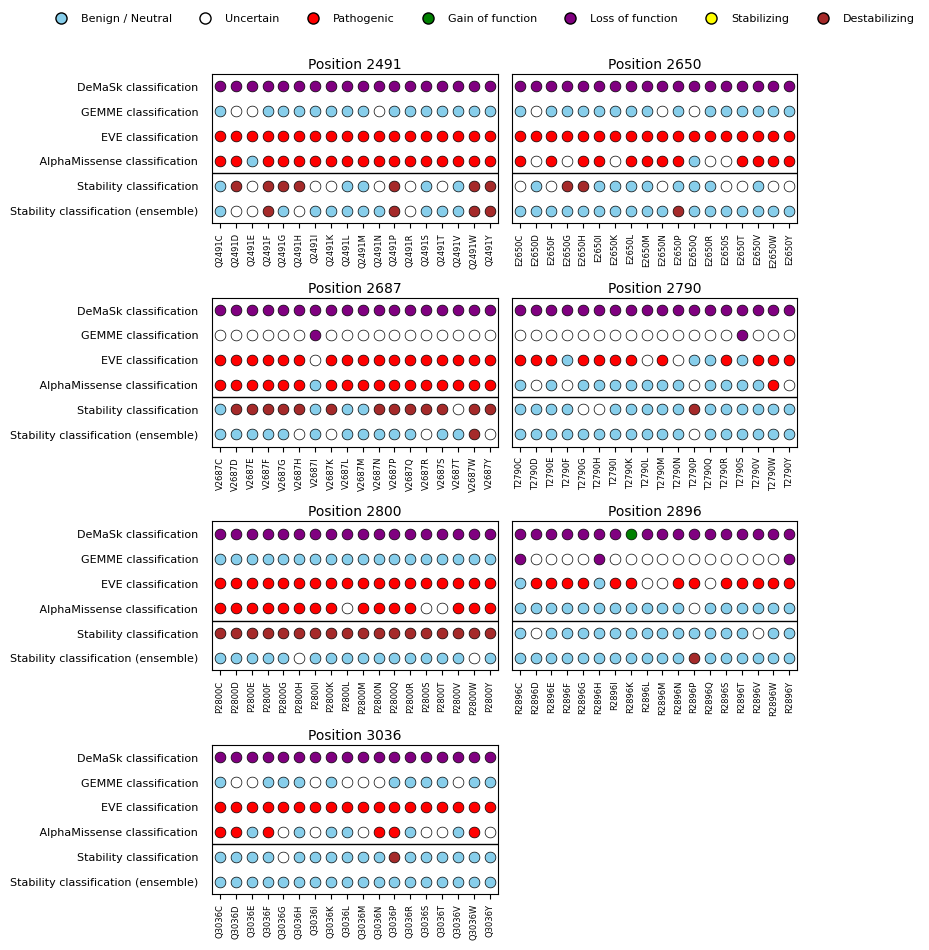

In [25]:
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Prepare the data
predictors = [
    "DeMaSk classification",
    "GEMME classification",
    "EVE classification",
    " AlphaMissense classification",
    "Stability classification",
    "Stability classification (ensemble)",
]

# Melt to long format
df_melt = df_energy_merged.melt(
    id_vars=["Mutation"],
    value_vars=predictors,
    var_name="Predictor",
    value_name="Classification"
)

# Pivot to wide format for heatmap
heatmap_df = df_melt.pivot(
    index="Predictor",
    columns="Mutation",
    values="Classification"
).reindex(index=predictors)

# Map classifications to numerical codes
categories = ["Benign / Neutral", "Uncertain", "Pathogenic", "Gain of function", "Loss of function", "Stabilizing", "Destabilizing"]
color_map = ["skyblue", "white", "red", "green", "purple", "yellow", "brown"]
cmap = ListedColormap(color_map)
bounds = list(range(len(categories) + 1))
norm   = BoundaryNorm(bounds, cmap.N)

numeric_df = heatmap_df.applymap(lambda x: categories.index(x) if x in categories else -1)

cmap = ListedColormap(color_map)
positions = [re.search(r'\d+', col).group() for col in numeric_df.columns]
unique_positions = sorted(set(positions), key=lambda x: int(x))

# 4×3 grid with a tiny gap horizontally and vertically
fig, axes = plt.subplots(
    4, 2,
    figsize=(9, 10),
    sharey=False,
    constrained_layout=False,
    gridspec_kw={'wspace': 0.05, 'hspace': 0.5}
)
axes = axes.flatten()

# Reserve space on left for predictor labels, and space on top for the legend
fig.subplots_adjust(left=0.25, top=0.93)

for idx, (ax, pos) in enumerate(zip(axes, unique_positions)):
    cols = [c for c in numeric_df.columns if re.search(r'\d+', c).group() == pos]

    # Draw circles
    for i, predictor in enumerate(numeric_df.index):
        for j, mut in enumerate(cols):
            code = numeric_df.at[predictor, mut]
            if code < 0:
                continue
            ax.scatter(
                j, i,
                marker='o',
                s=60,
                facecolor=cmap(code),
                edgecolor='black',
                linewidth=0.5
            )
        
    # add the horizontal divider for energy class
    ax.axhline(
        y= 4 - 0.5,
        color='black',
        linewidth=1
    )

    # X-axis labels
    ax.set_xticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=6)

    # Title
    ax.set_title(f'Position {pos}', fontsize=10, pad=4)

    # Y-axis labels only in first column of each row
    if idx % 2 == 0:
        ax.set_yticks(range(len(numeric_df.index)))
        ax.set_yticklabels(numeric_df.index, fontsize=8)
        ax.tick_params(
            axis='y',
            which='both',
            labelleft=True,
            labelright=False,
            pad=10,
            length=0
        )
    else:
        ax.set_yticks([])
        ax.tick_params(labelleft=False)

    # Tight bounds
    ax.set_xlim(-0.5, len(cols) - 0.5)
    ax.set_ylim(len(numeric_df.index) - 0.5, -0.5)

# Remove any extra axes if fewer than 12 positions
for ax in axes[len(unique_positions):]:
    fig.delaxes(ax)

# Legend on top with circle markers
legend_handles = [
    Line2D([], [], marker='o', linestyle='None',
           markersize=8,
           markerfacecolor=color_map[i],
           markeredgecolor='black',
           label=categories[i])
    for i in range(len(categories))
]
fig.legend(
    handles=legend_handles,
    ncol=len(categories),
    frameon=False,
    fontsize=8,
    loc='lower center',
    bbox_to_anchor=(0.55, 0.97)   # y=0.97 to tuck it just under the top
)

plt.show()